In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Set_option to avoid truncation of columns and rows:-

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
df=pd.read_csv('D:\data sets\Leads.csv')

In [4]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
df.shape

(9240, 37)

In [6]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### data quality check and cleaning

In [7]:
df.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

###  observation

### 1:Total 7 numeric columns and 30 categorical columns.
### 2:None of the columns have inconsistent datatype, hence no conversion is required.

In [9]:
# check for duplicates
df=df.drop_duplicates(subset=None)

In [10]:
df.shape

(9240, 37)

## observation
 ### Since the shape before and after dropping duplicate is same hence it seems no duplicate values in the dataset

In [11]:
# find columns having lavel Select

In [12]:
col=list(df.columns)
for i in col:
    if 'Select' in df[i].values:
        print(i)

Specialization
How did you hear about X Education
Lead Profile
City


C:\Users\Sony\AppData\Local\Temp\ipykernel_7580\3659049887.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'Select' in df[i].values:


In [13]:
df['Specialization'].unique()

array(['Select', 'Business Administration', 'Media and Advertising', nan,
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

### Observation
###We found that column 'Specialization','How did you hear about X Education','Lead Profile' and 'City' having 'Select' level.Which means the customer had not selected option while filling form.So it is better to impute will 'Null' values.

In [14]:
# replace Select with nan

In [15]:
df=df.replace('Select',np.nan)

#  check for misssing values

In [16]:
miss=df.isnull().sum().sort_values(ascending=False)

In [17]:
per_miss=round((miss/len(df))*100,2)

In [18]:
per_miss.head(10)

How did you hear about X Education    78.46
Lead Profile                          74.19
Lead Quality                          51.59
Asymmetrique Profile Score            45.65
Asymmetrique Activity Score           45.65
Asymmetrique Activity Index           45.65
Asymmetrique Profile Index            45.65
City                                  39.71
Specialization                        36.58
Tags                                  36.29
dtype: float64

# Handling missing values

#  create df for missing values

In [19]:
def missing_data(df):
    miss_num=df.isnull().sum().sort_values(ascending=False)
    miss_per=round((miss_num/len(df))*100,2)
    a=pd.DataFrame(miss_num[miss_num>0])
    b=pd.DataFrame(miss_per[miss_per>0])
    miss_table=pd.concat([a,b],axis=1)
    miss_table.columns=['missing_count','mising_percent']
    return miss_table

In [20]:
null=missing_data(df)


In [21]:
null

,missing_count,mising_percent
How did you hear about X Education,7250,78.46
Lead Profile,6855,74.19
Lead Quality,4767,51.59
Asymmetrique Profile Score,4218,45.65
Asymmetrique Activity Score,4218,45.65
Asymmetrique Activity Index,4218,45.65
Asymmetrique Profile Index,4218,45.65
City,3669,39.71
Specialization,3380,36.58
Tags,3353,36.29


## handling missing values

### observation
 1:How did you hear about X Education,Lead Profile Above two columns having more than 70% missing values so better to drop them.
 2:Lead Quality	 having ~51% missing values so we can drop it.
 3:Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score
     coloumns having missing value ~45%  so we can drop it
 4:City also have 40% missing values so its better to drop it 

In [22]:
miss_col=df.columns[(df.isnull().sum()/len(df))*100>40]


In [23]:
miss_col

Index(['How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], dtype='object')

In [24]:
df=df.drop(miss_col,axis=1)

In [25]:
df.shape

(9240, 30)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [27]:
df['Specialization'].replace(np.nan,'other',inplace=True)

In [28]:
df['What is your current occupation'].unique()

array(['Unemployed', 'Student', nan, 'Working Professional',
       'Businessman', 'Other', 'Housewife'], dtype=object)

In [29]:
df['What is your current occupation'].replace(np.nan,'Other',inplace=True)

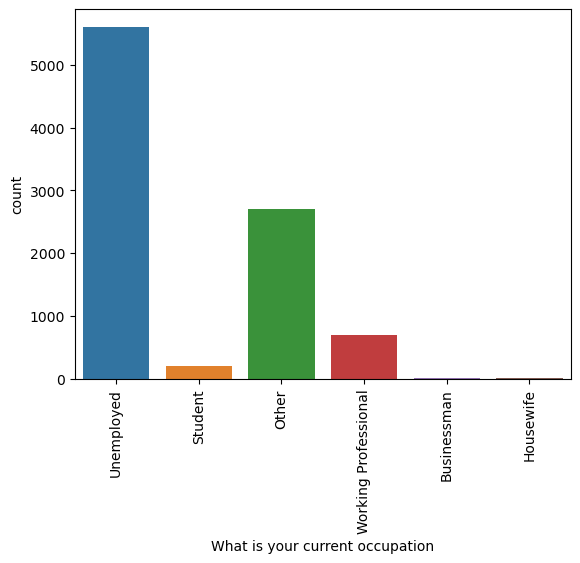

In [30]:
sns.countplot(x='What is your current occupation',data=df)
plt.xticks(rotation=90)
plt.show()

In [31]:
df['What matters most to you in choosing a course'].unique()

array(['Better Career Prospects', nan, 'Flexibility & Convenience',
       'Other'], dtype=object)

In [32]:
df['What matters most to you in choosing a course'].replace(np.nan,'Other',inplace=True)

In [33]:
df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [34]:
df['Country'].fillna('India',inplace=True)

In [35]:
df.drop('Country',1,inplace=True)

C:\Users\Sony\AppData\Local\Temp\ipykernel_7580\351419396.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop('Country',1,inplace=True)


In [36]:
df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

### Observation
From above data we can see that there are two 'Google' and 'google' ,so better to replace 'google' with 'Google'.

'Google' is having highest number occurance so we can impute missing values with 'Google'.

In [37]:
df['Lead Source'].replace('google','Google',inplace=True)

In [38]:
df['Lead Source'].fillna('Google',inplace=True)

In [39]:
df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

###    Observation
As we do not know the last activity of leads which are missing values and most frequent value is 'Email Opened'
so we can impute missing value with 'Email Opened'.

In [40]:
df['Last Activity'].fillna('Email Opened',inplace=True)

In [41]:
df['Page Views Per Visit'].value_counts()

0.00     2189
2.00     1795
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.25       19
11.00      18
3.67       16
6.50       13
1.80       13
2.75       12
1.40       11
2.80        9
14.00       9
4.33        9
2.20        9
2.17        8
1.60        8
3.25        8
2.40        6
13.00       6
12.00       5
1.20        5
1.83        4
3.40        4
2.60        4
1.43        4
15.00       4
1.71        4
1.78        3
4.25        3
16.00       3
4.75        3
5.67        3
1.57        3
1.38        3
3.60        2
1.23        2
1.56        2
5.40        2
2.22        2
7.50        2
1.14        2
5.25        2
2.09        2
3.20        2
3.75        2
5.33        2
2.83        2
2.71        2
1.22        2
2.13        1
1.54        1
6.67  

In [42]:
df['TotalVisits'].fillna(df['TotalVisits'].median(), inplace=True)

df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].median(), inplace=True)

In [43]:
# Checking missing values after treating missing values:-

round(100*(df.isnull().sum()/len(df)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [44]:
#good to drop these two columns having missing values 40 %
df.drop(['Tags','City'],1,inplace=True)

C:\Users\Sony\AppData\Local\Temp\ipykernel_7580\2432997499.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Tags','City'],1,inplace=True)


In [45]:
round(100*(df.isnull().sum()/len(df)),2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

In [46]:
df['Through Recommendations'].unique()

array(['No', 'Yes'], dtype=object)

In [47]:
df['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [48]:
df['Receive More Updates About Our Courses'].unique()

array(['No'], dtype=object)

## ```````````Checking 'Prospect ID' and 'Lead Number' columns

In [49]:
# Checking duplicate values in 'Prospect ID':-

df.duplicated(subset = 'Prospect ID').sum()

0

In [50]:
df.duplicated(subset='Lead Number').sum()

0

## Observation
'Prospect ID' and 'Lead Number' both do not have duplicate values means these columns identify each data uniquely 
so working as unique Id and will not make any significant impact on our model.So we can drop it.

In [51]:
df.drop(['Prospect ID','Lead Number'],1,inplace=True)

C:\Users\Sony\AppData\Local\Temp\ipykernel_7580\4160153107.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Prospect ID','Lead Number'],1,inplace=True)


In [52]:
col=df.columns

In [53]:
for i in col:
    print(i,'--------')
    print(df[i].value_counts(),'\n')

Lead Origin --------
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64 

Lead Source --------
Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64 

Do Not Email --------
No     8506
Yes     734
Name: Do Not Email, dtype: int64 

Do Not Call --------
No     9238
Yes       2
Name: Do Not Call, dtype: int64 

Converted --------
0    5679
1    3561
Name: Conve

### Dropping some irrelevant columns

In [54]:
df.drop(['Do Not Call','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
          'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
         'Get updates on DM Content','I agree to pay the amount through cheque'],1,inplace=True)

C:\Users\Sony\AppData\Local\Temp\ipykernel_7580\2661772619.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Do Not Call','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',


In [55]:
df.drop('Last Notable Activity',1,inplace=True)

C:\Users\Sony\AppData\Local\Temp\ipykernel_7580\536438521.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop('Last Notable Activity',1,inplace=True)


In [56]:
df.shape

(9240, 11)

In [58]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,other,Unemployed,No
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,other,Unemployed,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,other,Unemployed,No


# Step 3: Exploratory Data Analysis(EDA)
Univariate Analysis

### As per problem statement 'Converted' is our target variable.

The target variable. Indicates whether a lead has been successfully converted or not.

0: Not converted into lead.
1: Lead has been successfully Converted.
Calculating conversion rate

In [59]:
# Calculating conversion rate:-
Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted

38.53896103896104

<Axes: xlabel='Converted', ylabel='count'>

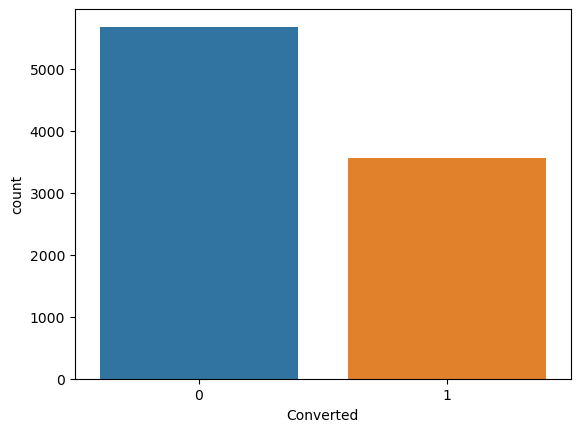

In [60]:
sns.countplot(x='Converted',data=df)

In [61]:
df['Converted'].value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

In [62]:
#ratio between o and 1
sum(df['Converted']==1)/sum(df['Converted']==0)

0.6270470153195985

In [63]:
df.dtypes

Lead Origin                                object
Lead Source                                object
Do Not Email                               object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
What is your current occupation            object
A free copy of Mastering The Interview     object
dtype: object

In [ ]:
#numerical and categorical analyses

In [ ]:
df.groupby(by='Lead Origin')['Converted'].count()

In [ ]:
sns.countplot(x='Lead Origin',hue='Converted',data=df)
plt.xticks(rotation=90)
plt.show()

In [64]:
df.groupby(by='Lead Source')['Converted'].count()

Lead Source
Click2call              4
Direct Traffic       2543
Facebook               55
Google               2909
Live Chat               2
NC_EDM                  1
Olark Chat           1755
Organic Search       1154
Pay per Click Ads       1
Press_Release           2
Reference             534
Referral Sites        125
Social Media            2
WeLearn                 1
Welingak Website      142
bing                    6
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: Converted, dtype: int64

In [65]:
# Combining all low frequency values together:-

df['Lead Source'] = df['Lead Source'].replace(['blog','Pay per Click Ads','bing','Social Media','WeLearn','Click2call', 'Live Chat',
                                               'welearnblog_Home', 'youtubechannel','testone',
                                               'Press_Release','NC_EDM'], 'Others')

In [66]:
df.groupby(by='Lead Source')['Converted'].count()

Lead Source
Direct Traffic      2543
Facebook              55
Google              2909
Olark Chat          1755
Organic Search      1154
Others                23
Reference            534
Referral Sites       125
Welingak Website     142
Name: Converted, dtype: int64

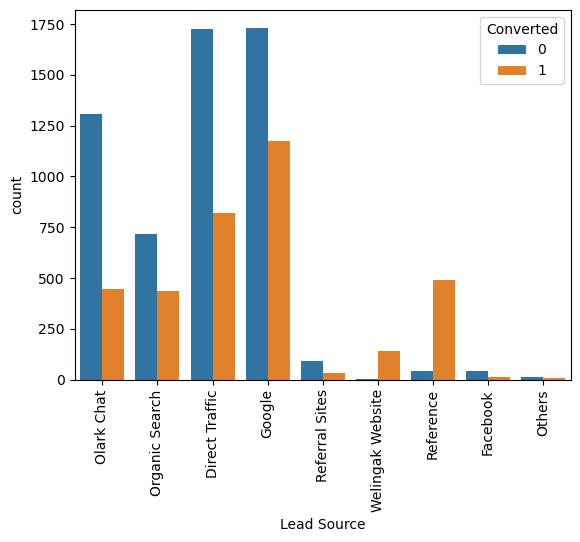

In [67]:
sns.countplot(x='Lead Source',hue='Converted',data=df)
plt.xticks(rotation=90)
plt.show()

In [68]:
df.groupby(by='Do Not Email')['Converted'].count()

Do Not Email
No     8506
Yes     734
Name: Converted, dtype: int64

<Axes: xlabel='Do Not Email', ylabel='count'>

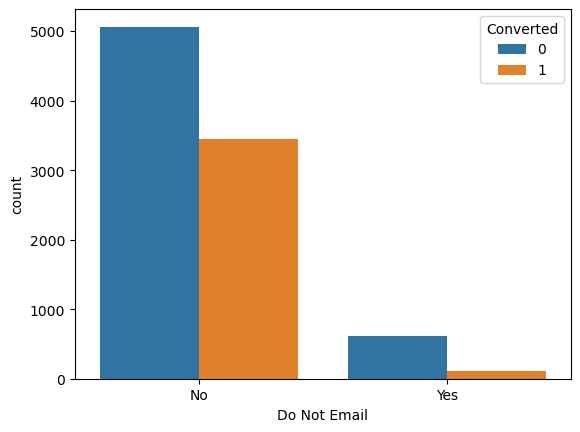

In [69]:
sns.countplot(x = "Do Not Email", hue = "Converted", data = df)

In [70]:
#observation
#more people  prefer to reject the 'do not email option', means more people wants email

IndentationError: unexpected indent (2112051419.py, line 2)

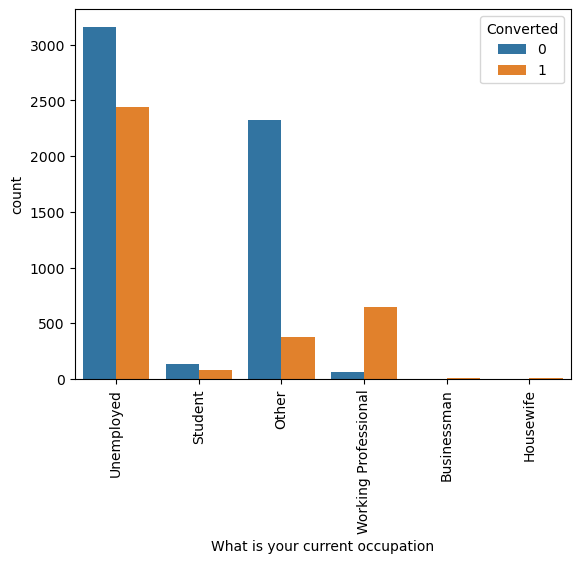

In [71]:
sns.countplot(x = "What is your current occupation", hue = "Converted", data = df)
plt.xticks(rotation=90)
plt.show()

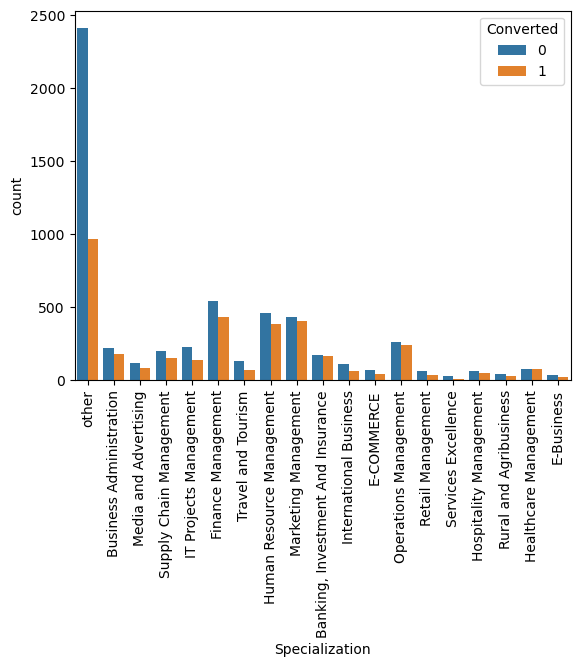

In [72]:
sns.countplot(x = "Specialization", hue = "Converted", data = df)
plt.xticks(rotation=90)
plt.show()

# Analyzing Numerical Variables

Outlier Analysis and treatment

<Axes: xlabel='TotalVisits'>

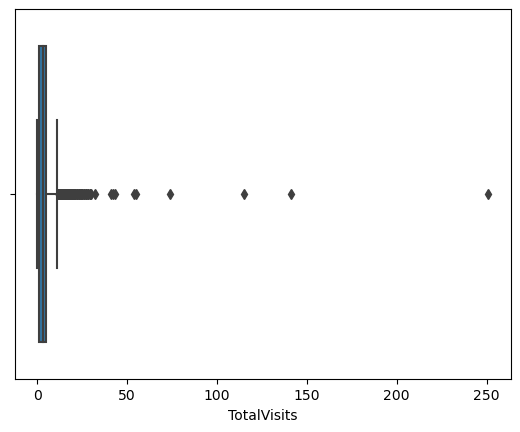

In [73]:
sns.boxplot(x='TotalVisits',data=df)

### Observation
We can see from above box plot that only upper range outliers are present in data, so need to treat outliers.

In [ ]:
Q3 = df.TotalVisits.quantile(0.99)
Q3

In [ ]:
df = df[(df.TotalVisits <= Q3)]

In [ ]:
sns.boxplot(x='TotalVisits',data=df)

In [ ]:
sns.boxplot(x='Total Time Spent on Website',data=df)

In [ ]:
sns.boxplot(x='Page Views Per Visit',data=df)

### Observation
We can see from above box plot that only upper range outliers are present in data, so need to treat outliers.

In [ ]:
Q3=df['Page Views Per Visit'].quantile(0.99)
Q3

In [ ]:
df=df[df['Page Views Per Visit']<=Q3]

In [ ]:
sns.boxplot(x='Page Views Per Visit',data=df)

In [ ]:
l1=df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
l1.describe(percentiles=[.25, .5, .75, .90, .95, .99])

### Bivariate Analysis
# Heatmap to understand the attributes correlation:-

In [ ]:

sns.heatmap(df.corr(),annot = True,cmap='Greens')

### Observation
'TotalVisits' and 'Page Views per Visit' are highly correlated with correlation of .72
'Total Time Spent on Website' has correlation of 0.36 with target variable 'Converted'.

# Data Preparation
Converting some binary variables (Yes/No) to 0/1

In [74]:
var =  ['Do Not Email','A free copy of Mastering The Interview']
def binary_map(x):
    return x.map({'Yes':1,'No':0})

In [75]:
df[var]=df[var].apply(binary_map)

In [76]:
df

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,0,0,0.0,0,0.00,Page Visited on Website,other,Unemployed,0
1,API,Organic Search,0,0,5.0,674,2.50,Email Opened,other,Unemployed,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.00,Email Opened,Business Administration,Student,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.00,Converted to Lead,other,Unemployed,0
...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,1,1,8.0,1845,2.67,Email Marked Spam,IT Projects Management,Unemployed,0
9236,Landing Page Submission,Direct Traffic,0,0,2.0,238,2.00,SMS Sent,Media and Advertising,Unemployed,1
9237,Landing Page Submission,Direct Traffic,1,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,1
9238,Landing Page Submission,Google,0,1,3.0,499,3.00,SMS Sent,Human Resource Management,Other,0


## Creating Dummy Variable
For categorical variables with multiple levels, create dummy features 

In [78]:
cat_col

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation'], dtype='object')

In [79]:
dummy=pd.get_dummies(df[cat_col],drop_first=True)

In [80]:
dummy

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_other,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9236,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
9237,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9238,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [81]:
df=pd.concat([df,dummy],axis=1)

In [ ]:
df.head()

In [82]:
df.shape

(9240, 62)

In [83]:
df=df.drop(cat_col,axis=1)

In [84]:
df.shape

(9240, 57)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 57 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9240 non-null   int64  
 1   Converted                                             9240 non-null   int64  
 2   TotalVisits                                           9240 non-null   float64
 3   Total Time Spent on Website                           9240 non-null   int64  
 4   Page Views Per Visit                                  9240 non-null   float64
 5   A free copy of Mastering The Interview                9240 non-null   int64  
 6   Lead Origin_Landing Page Submission                   9240 non-null   uint8  
 7   Lead Origin_Lead Add Form                             9240 non-null   uint8  
 8   Lead Origin_Lead Import                               9240

# Step 5: Test-Train Split

In [86]:
y=df['Converted']
y

0       0
1       0
2       1
3       0
4       1
       ..
9235    1
9236    0
9237    0
9238    1
9239    1
Name: Converted, Length: 9240, dtype: int64

In [87]:
x=df.drop(['Converted'],axis=1)
x.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_other,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


# split the data in to train and test set

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,train_size=0.7,random_state=0)

In [90]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6468 entries, 6627 to 2732
Data columns (total 56 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          6468 non-null   int64  
 1   TotalVisits                                           6468 non-null   float64
 2   Total Time Spent on Website                           6468 non-null   int64  
 3   Page Views Per Visit                                  6468 non-null   float64
 4   A free copy of Mastering The Interview                6468 non-null   int64  
 5   Lead Origin_Landing Page Submission                   6468 non-null   uint8  
 6   Lead Origin_Lead Add Form                             6468 non-null   uint8  
 7   Lead Origin_Lead Import                               6468 non-null   uint8  
 8   Lead Origin_Quick Add Form                            6

In [91]:
y_train.shape

(6468,)

In [92]:
x_train.shape

(6468, 56)

In [93]:
x_test.shape

(2772, 56)

In [94]:
y_test.shape

(2772,)

# Feature scaling

In [95]:
from sklearn.preprocessing import StandardScaler

In [96]:
scaler=StandardScaler()


In [97]:
x_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(x_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
x_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_other,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
6627,0,-0.279870,1.127624,-0.174194,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4953,0,0.289435,-0.523427,1.195387,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
5111,0,0.099666,-0.444980,0.738860,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1906,0,-0.279870,1.682232,-0.630721,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4917,0,-0.659406,-0.890125,-1.087247,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

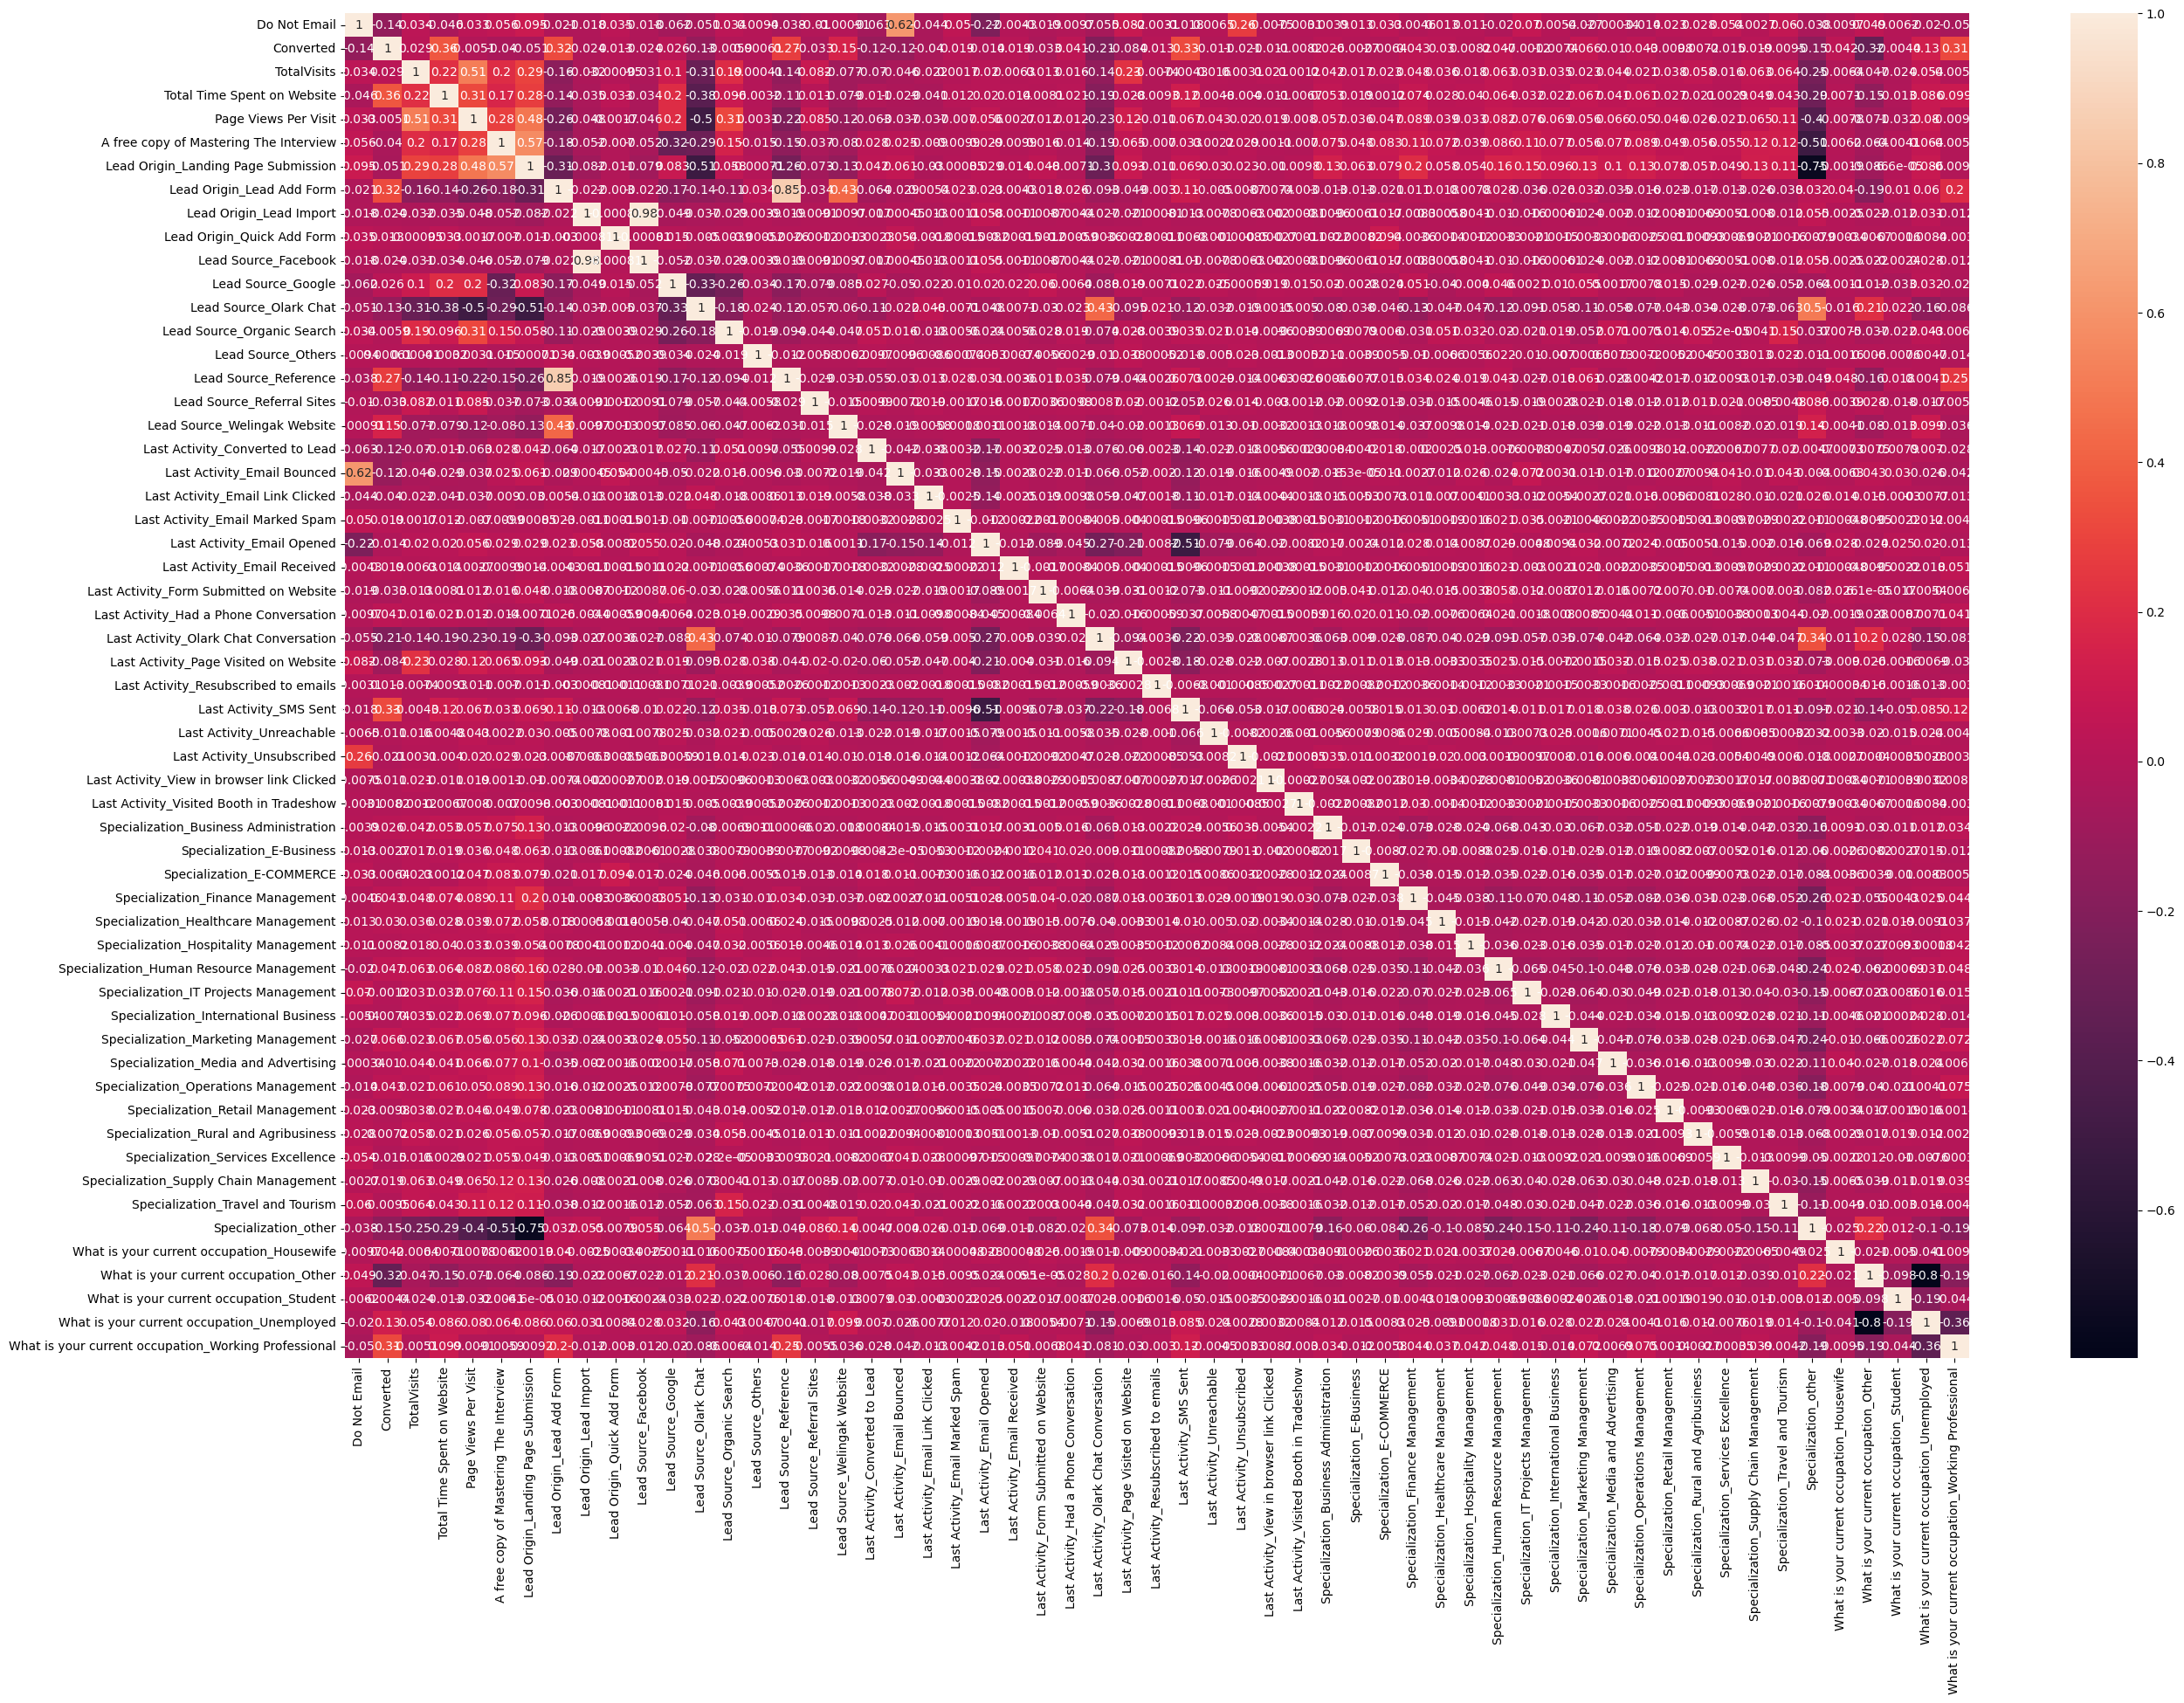

In [99]:
plt.figure(figsize = (30,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Feature selection using RFE

In [100]:
from sklearn.linear_model import LogisticRegression

In [101]:
logreg=LogisticRegression()


In [102]:
import statsmodels.api as sm

## Using RFE for feature elimination

In [103]:
from sklearn.feature_selection import RFE

In [104]:
rfe=RFE(estimator=logreg,n_features_to_select=15)
rfe.fit(x_train,y_train)

C:\Users\Sony\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sony\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\Sony\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [105]:
print(rfe.support_)
print(rfe.ranking_)

[ True False  True False False  True  True False False  True False  True
 False False False False  True  True False False False False False  True
 False  True False False  True False False False False False False False
 False False False False False False False False False False False False
 False False  True  True  True False False  True]
[ 1 26  1 25 15  1  1  9 29  1 22  1 23  8 21 32  1  1  3 11 18 42 30  1
  6  1 12  2  1 27  7 10 28 39 41 19 37 16  5 38 35 33 34 17 31  4 40 24
 36 20  1  1  1 14 13  1]


In [106]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 26),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 25),
 ('A free copy of Mastering The Interview', False, 15),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 9),
 ('Lead Origin_Quick Add Form', False, 29),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 22),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 23),
 ('Lead Source_Others', False, 8),
 ('Lead Source_Reference', False, 21),
 ('Lead Source_Referral Sites', False, 32),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', False, 3),
 ('Last Activity_Email Link Clicked', False, 11),
 ('Last Activity_Email Marked Spam', False, 18),
 ('Last Activity_Email Opened', False, 42),
 ('Last Activity_Email Received', False, 30),
 ('Last Activity_Form Submitted on

### Storing columns selected by RFE into 'col' and displaying it:-

In [107]:
col=x_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form', 'Lead Source_Facebook', 'Lead Source_Olark Chat', 'Lead Source_Welingak Website', 'Last Activity_Converted to Lead', 'Last Activity_Form Submitted on Website', 'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent', 'Specialization_other', 'What is your current occupation_Housewife', 'What is your current occupation_Other', 'What is your current occupation_Working Professional'], dtype='object')

In [108]:
# Creating X_test dataframe with RFE selected variables:
x_train=x_train[col]
x_train

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Facebook,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Specialization_other,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Working Professional
6627,0,1.127624,1,0,0,0,0,0,0,0,1,0,0,0,0
4953,0,-0.523427,1,0,0,0,0,0,0,0,1,0,0,1,0
5111,0,-0.444980,0,0,0,0,0,0,0,0,0,1,0,0,0
1906,0,1.682232,0,0,0,0,0,0,0,0,0,0,0,1,0
4917,0,-0.890125,0,0,0,1,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7891,0,1.034582,0,0,0,0,0,0,0,1,0,1,0,0,0
9225,1,-0.755122,1,0,0,0,0,0,0,0,0,0,0,0,0
4859,0,-0.890125,0,0,0,1,0,0,0,0,0,1,0,0,0
3264,0,-0.890125,0,0,0,1,0,0,0,1,0,1,0,1,0


In [109]:
len(x_train.columns)

15

# Acess the model

# model 1

In [110]:
#add a constant
x_train=sm.add_constant(x_train)
x_train

,const,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Facebook,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Specialization_other,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Working Professional
6627,1.0,0,1.127624,1,0,0,0,0,0,0,0,1,0,0,0,0
4953,1.0,0,-0.523427,1,0,0,0,0,0,0,0,1,0,0,1,0
5111,1.0,0,-0.444980,0,0,0,0,0,0,0,0,0,1,0,0,0
1906,1.0,0,1.682232,0,0,0,0,0,0,0,0,0,0,0,1,0
4917,1.0,0,-0.890125,0,0,0,1,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7891,1.0,0,1.034582,0,0,0,0,0,0,0,1,0,1,0,0,0
9225,1.0,1,-0.755122,1,0,0,0,0,0,0,0,0,0,0,0,0
4859,1.0,0,-0.890125,0,0,0,1,0,0,0,0,0,1,0,0,0
3264,1.0,0,-0.890125,0,0,0,1,0,0,0,1,0,1,0,1,0


In [111]:
model1=sm.GLM(y_train,x_train,family=sm.families.Binomial())
model1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2602.0
Date:                Mon, 11 Mar 2024   Deviance:                       5204.0
Time:                        11:05:25   Pearson chi2:                 7.00e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4088
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0618      0.126     -0.491      0.624      -0.309       0.185
Do Not Email                                            -1.4459      0.166     -8.688      0.000      -1.772      -1.120
Total Time Spent on Website                              1.0809      0.040     26.783      0.000       1.002       1.160
Lead Origin_Landing Page Submission                     -1.0336      0.129     -8.030      0.000      -1.286      -0.781
Lead Origin_Lead Add Form                                2.7760      0.212     13.087      0.000       2.360       3.192
Lead Source_Facebook                                    -1.1882      0.592     -2.006      0.045      -2.349      -0.027
Lead Source_Olark Chat                                   1.1238      0.124      9.028      0.000       0.880       1.368
Lead Source_Welingak Website                             3.2634      1.029      3.170      0.002       1.246       5.281
Last Activity_Converted to Lead                         -1.1663      0.214     -5.455      0.000      -1.585      -0.747
Last Activity_Form Submitted on Website                 -1.0737      0.361     -2.976      0.003      -1.781      -0.367
Last Activity_Olark Chat Conversation                   -1.3353      0.167     -7.980      0.000      -1.663      -1.007
Last Activity_SMS Sent                                   1.2455      0.075     16.527      0.000       1.098       1.393
Specialization_other                                    -0.9840      0.124     -7.962      0.000      -1.226      -0.742
What is your current occupation_Housewife               22.6678   1.76e+04      0.001      0.999   -3.44e+04    3.44e+04
What is your current occupation_Other                   -1.2991      0.090    -14.494      0.000      -1.475      -1.123
What is your current occupation_Working Professional     2.2169      0.179     12.393      0.000       1.866       2.568
========================================================================================================================
"""

# checking VIF for multicollinearity : variance_inflation_factor

In [112]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [113]:
vif=pd.DataFrame()
vif['feature']=x_train.columns
vif

,feature
0,const
1,Do Not Email
2,Total Time Spent on Website
3,Lead Origin_Landing Page Submission
4,Lead Origin_Lead Add Form
5,Lead Source_Facebook
6,Lead Source_Olark Chat
7,Lead Source_Welingak Website
8,Last Activity_Converted to Lead
9,Last Activity_Form Submitted on Website


In [114]:
vif['VIF']=[variance_inflation_factor(x_train.values,i) for i in range (0,len(vif))]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,feature,VIF
0,const,13.80
3,Lead Origin_Landing Page Submission,3.42
12,Specialization_other,2.95
6,Lead Source_Olark Chat,1.95
4,Lead Origin_Lead Add Form,1.80
10,Last Activity_Olark Chat Conversation,1.34
7,Lead Source_Welingak Website,1.31
2,Total Time Spent on Website,1.28
14,What is your current occupation_Other,1.15
15,What is your current occupation_Working Profes...,1.15


In [115]:
##Dropping insignificant column and updating the model
x_train=x_train.drop('What is your current occupation_Housewife',axis=1)

## model2

In [116]:
x_train=sm.add_constant(x_train)
model2=sm.GLM(y_train,x_train,family=sm.families.Binomial())
model2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2604.8
Date:                Mon, 11 Mar 2024   Deviance:                       5209.6
Time:                        11:05:37   Pearson chi2:                 7.01e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4082
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0564      0.126     -0.448      0.654      -0.303       0.190
Do Not Email                                            -1.4481      0.166     -8.702      0.000      -1.774      -1.122
Total Time Spent on Website                              1.0800      0.040     26.789      0.000       1.001       1.159
Lead Origin_Landing Page Submission                     -1.0343      0.129     -8.043      0.000      -1.286      -0.782
Lead Origin_Lead Add Form                                2.7803      0.212     13.116      0.000       2.365       3.196
Lead Source_Facebook                                    -1.1903      0.592     -2.010      0.044      -2.351      -0.030
Lead Source_Olark Chat                                   1.1219      0.124      9.016      0.000       0.878       1.366
Lead Source_Welingak Website                             3.2576      1.029      3.165      0.002       1.240       5.275
Last Activity_Converted to Lead                         -1.1695      0.214     -5.471      0.000      -1.588      -0.751
Last Activity_Form Submitted on Website                 -1.0773      0.361     -2.986      0.003      -1.784      -0.370
Last Activity_Olark Chat Conversation                   -1.3370      0.167     -7.991      0.000      -1.665      -1.009
Last Activity_SMS Sent                                   1.2422      0.075     16.490      0.000       1.095       1.390
Specialization_other                                    -0.9872      0.124     -7.993      0.000      -1.229      -0.745
What is your current occupation_Other                   -1.3005      0.090    -14.513      0.000      -1.476      -1.125
What is your current occupation_Working Professional     2.2137      0.179     12.376      0.000       1.863       2.564
========================================================================================================================
"""

# Again check VIF

In [117]:
vif=pd.DataFrame()
vif['Feature']=x_train.columns
vif['VIF']=[variance_inflation_factor(x_train.values,i) for i in range (0,len(vif))]

In [118]:
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Feature,VIF
0,const,13.78
3,Lead Origin_Landing Page Submission,3.42
12,Specialization_other,2.95
6,Lead Source_Olark Chat,1.95
4,Lead Origin_Lead Add Form,1.80
10,Last Activity_Olark Chat Conversation,1.34
7,Lead Source_Welingak Website,1.31
2,Total Time Spent on Website,1.28
13,What is your current occupation_Other,1.15
14,What is your current occupation_Working Profes...,1.15


In [119]:
#drop the insignificant column
x_train=x_train.drop('Lead Source_Facebook',axis=1)

## model 3

In [120]:
x_train=sm.add_constant(x_train)

In [121]:
model3=sm.GLM(y_train,x_train,family=sm.families.Binomial())
model3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2607.3
Date:                Mon, 11 Mar 2024   Deviance:                       5214.6
Time:                        11:05:46   Pearson chi2:                 7.03e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4078
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0891      0.124     -0.716      0.474      -0.333       0.155
Do Not Email                                            -1.4447      0.166     -8.678      0.000      -1.771      -1.118
Total Time Spent on Website                              1.0829      0.040     26.883      0.000       1.004       1.162
Lead Origin_Landing Page Submission                     -1.0068      0.127     -7.901      0.000      -1.257      -0.757
Lead Origin_Lead Add Form                                2.8113      0.211     13.295      0.000       2.397       3.226
Lead Source_Olark Chat                                   1.1517      0.124      9.304      0.000       0.909       1.394
Lead Source_Welingak Website                             3.2574      1.029      3.165      0.002       1.240       5.275
Last Activity_Converted to Lead                         -1.1572      0.214     -5.413      0.000      -1.576      -0.738
Last Activity_Form Submitted on Website                 -1.0701      0.361     -2.966      0.003      -1.777      -0.363
Last Activity_Olark Chat Conversation                   -1.3272      0.167     -7.933      0.000      -1.655      -0.999
Last Activity_SMS Sent                                   1.2484      0.075     16.583      0.000       1.101       1.396
Specialization_other                                    -0.9860      0.123     -8.020      0.000      -1.227      -0.745
What is your current occupation_Other                   -1.2988      0.090    -14.490      0.000      -1.475      -1.123
What is your current occupation_Working Professional     2.2185      0.179     12.403      0.000       1.868       2.569
========================================================================================================================
"""

In [122]:
vif=pd.DataFrame()
vif['Featue']=x_train.columns
vif['VIF']=[variance_inflation_factor(x_train.values,i) for i in range (0,len(vif))]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif
                                                                        

,Featue,VIF
0,const,13.59
3,Lead Origin_Landing Page Submission,3.39
11,Specialization_other,2.95
5,Lead Source_Olark Chat,1.93
4,Lead Origin_Lead Add Form,1.78
9,Last Activity_Olark Chat Conversation,1.34
6,Lead Source_Welingak Website,1.31
2,Total Time Spent on Website,1.28
12,What is your current occupation_Other,1.15
13,What is your current occupation_Working Profes...,1.15


In [123]:
x_train=x_train.drop('Last Activity_Form Submitted on Website',axis=1)

## model 4

In [124]:
x_train=sm.add_constant(x_train)
model4=sm.GLM(y_train,x_train,family=sm.families.Binomial())
res=model4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2612.3
Date:                Mon, 11 Mar 2024   Deviance:                       5224.6
Time:                        11:06:02   Pearson chi2:                 7.01e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4069
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1269      0.123     -1.028      0.304      -0.369       0.115
Do Not Email                                            -1.4340      0.167     -8.611      0.000      -1.760      -1.108
Total Time Spent on Website                              1.0824      0.040     26.896      0.000       1.003       1.161
Lead Origin_Landing Page Submission                     -0.9927      0.127     -7.831      0.000      -1.241      -0.744
Lead Origin_Lead Add Form                                2.8251      0.211     13.374      0.000       2.411       3.239
Lead Source_Olark Chat                                   1.1528      0.124      9.314      0.000       0.910       1.395
Lead Source_Welingak Website                             3.2458      1.029      3.153      0.002       1.228       5.263
Last Activity_Converted to Lead                         -1.1332      0.213     -5.310      0.000      -1.552      -0.715
Last Activity_Olark Chat Conversation                   -1.3097      0.167     -7.840      0.000      -1.637      -0.982
Last Activity_SMS Sent                                   1.2683      0.075     16.903      0.000       1.121       1.415
Specialization_other                                    -0.9594      0.122     -7.852      0.000      -1.199      -0.720
What is your current occupation_Other                   -1.3012      0.090    -14.528      0.000      -1.477      -1.126
What is your current occupation_Working Professional     2.2051      0.178     12.406      0.000       1.857       2.553
========================================================================================================================
"""

In [125]:
vif=pd.DataFrame()
vif['Featue']=x_train.columns
vif['VIF']=[variance_inflation_factor(x_train.values,i) for i in range (0,len(vif))]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Featue,VIF
0,const,13.48
3,Lead Origin_Landing Page Submission,3.39
10,Specialization_other,2.94
5,Lead Source_Olark Chat,1.93
4,Lead Origin_Lead Add Form,1.78
8,Last Activity_Olark Chat Conversation,1.34
6,Lead Source_Welingak Website,1.31
2,Total Time Spent on Website,1.28
11,What is your current occupation_Other,1.15
12,What is your current occupation_Working Profes...,1.15


#  Making prediction on 'train' dataset based on final model

In [126]:
y_train_pred=res.predict(x_train)
y_train_pred[:10]

6627    0.797253
4953    0.151990
5111    0.172511
1906    0.596931
4917    0.029088
1457    0.289681
5561    0.971692
5161    0.042929
5147    0.172834
3260    0.029088
dtype: float64

In [127]:
#reshaping
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.79725346, 0.15199019, 0.17251072, 0.59693084, 0.02908807,
       0.28968136, 0.97169164, 0.0429289 , 0.17283371, 0.02908807])

# Creating a dataframe with the actual churn flag and the predicted probabilities

In [128]:
y_train_pred_final=pd.DataFrame({'churn':y_train.values,'churn_prob':y_train_pred})
#adding column lead number
y_train_pred_final['lead_number']=y_train.index
y_train_pred_final.head()
                                 

,churn,churn_prob,lead_number
0,1,0.797253,6627
1,0,0.151990,4953
2,0,0.172511,5111
3,0,0.596931,1906
4,0,0.029088,4917


In [129]:
from sklearn import metrics

# Finding Optimal Cutoff Point

In [130]:
numbers = [float(x)/10 for x in range(10)]  # 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.churn_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,churn,churn_prob,lead_number,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.797253,6627,1,1,1,1,1,1,1,1,0,0
1,0,0.151990,4953,1,1,0,0,0,0,0,0,0,0
2,0,0.172511,5111,1,1,0,0,0,0,0,0,0,0
3,0,0.596931,1906,1,1,1,1,1,1,0,0,0,0
4,0,0.029088,4917,1,0,0,0,0,0,0,0,0,0


In [131]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.382035  1.000000  0.000000
0.1   0.1  0.644712  0.978146  0.438579
0.2   0.2  0.761132  0.921894  0.661746
0.3   0.3  0.796382  0.840955  0.768827
0.4   0.4  0.814626  0.777418  0.837628
0.5   0.5  0.818027  0.712262  0.883413
0.6   0.6  0.801330  0.606232  0.921941
0.7   0.7  0.784014  0.520437  0.946960
0.8   0.8  0.760977  0.422501  0.970228
0.9   0.9  0.712894  0.267098  0.988491


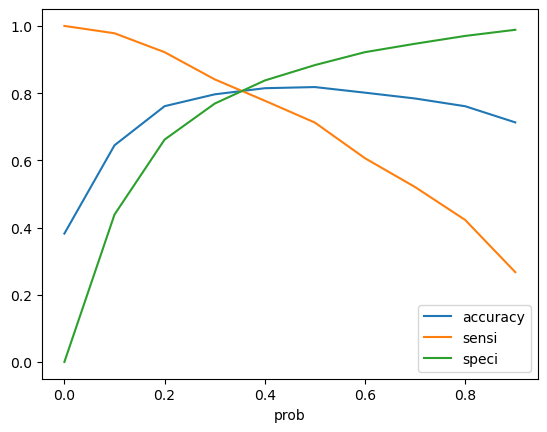

In [132]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

## From the curve above, it seems that 0.358 is optimal cutoff point to take .

In [133]:
y_train_pred_final['final_predicted'] = y_train_pred_final.churn_prob.map( lambda x: 1 if x > 0.358 else 0)

y_train_pred_final.head()

,churn,churn_prob,lead_number,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.797253,6627,1,1,1,1,1,1,1,1,0,0,1
1,0,0.151990,4953,1,1,0,0,0,0,0,0,0,0,0
2,0,0.172511,5111,1,1,0,0,0,0,0,0,0,0,0
3,0,0.596931,1906,1,1,1,1,1,1,0,0,0,0,1
4,0,0.029088,4917,1,0,0,0,0,0,0,0,0,0,0


In [134]:
# Dropping the unnecessary columns:-

y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis = 1, inplace = True) 

In [139]:
y_train_pred_final.head()

,churn,churn_prob,lead_number,final_predicted
0,1,0.797253,6627,1
1,0,0.151990,4953,0
2,0,0.172511,5111,0
3,0,0.596931,1906,1
4,0,0.029088,4917,0


In [136]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.churn, y_train_pred_final.final_predicted)

0.8085961657390229

# Model Evaluation

In [137]:
#Importing 'metrics' library:-

from sklearn import metrics

In [140]:
#confusion metrics
confusion=metrics.confusion_matrix(y_train_pred_final.churn,y_train_pred_final.final_predicted)
confusion

array([[3241,  756],
       [ 482, 1989]], dtype=int64)

In [141]:
#overall accuracy
print(metrics.accuracy_score(y_train_pred_final.churn, y_train_pred_final.final_predicted))

0.8085961657390229


### Metrics beyond simply accuracy¶

In [144]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [145]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8049372723593686

In [146]:
# Let us calculate specificity
TN / float(TN+FP)

0.8108581436077058

In [147]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.18914185639229422


In [148]:
# positive predictive value 
print (TP / float(TP+FP))

0.7245901639344262


In [149]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8705345151759334


## Precision and Recall
Precision

In [150]:
TP / TP + FP

757.0

In [151]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7245901639344262

## Recall
TP / TP + FN

# Calculating 'Recall' :

In [152]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8049372723593686

## Observation
We have the following values for the Train Data:

Accuracy : 80%
Sensitivity : 80%
Specificity : 81%
Pricision: 72%
Recall: 80%

## ROC Curve

In [153]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.show()

    return None

In [154]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.churn, y_train_pred_final.churn_prob, drop_intermediate = False )

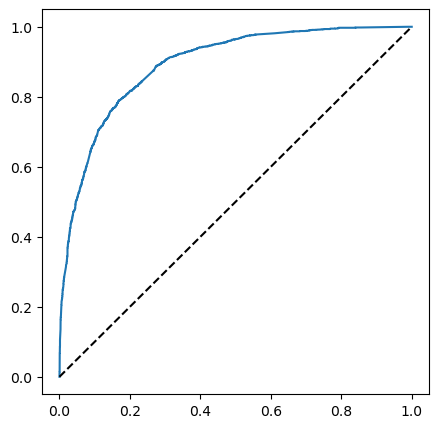

In [155]:
draw_roc(y_train_pred_final.churn, y_train_pred_final.churn_prob)

## observation
    ROC Curve should be a value close to 1.

## Making predictions on the test set

In [156]:
x_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(x_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [157]:
test_col = x_train.columns
test_col

Index(['const', 'Do Not Email', 'Total Time Spent on Website', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat', 'Lead Source_Welingak Website', 'Last Activity_Converted to Lead', 'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent', 'Specialization_other', 'What is your current occupation_Other', 'What is your current occupation_Working Professional'], dtype='object')

In [161]:
x_test=x_test[test_col[1:]]
# Adding constant variable to test dataframe:-
x_test = sm.add_constant(x_test)

In [162]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2772 entries, 2212 to 818
Data columns (total 13 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   const                                                 2772 non-null   float64
 1   Do Not Email                                          2772 non-null   int64  
 2   Total Time Spent on Website                           2772 non-null   float64
 3   Lead Origin_Landing Page Submission                   2772 non-null   uint8  
 4   Lead Origin_Lead Add Form                             2772 non-null   uint8  
 5   Lead Source_Olark Chat                                2772 non-null   uint8  
 6   Lead Source_Welingak Website                          2772 non-null   uint8  
 7   Last Activity_Converted to Lead                       2772 non-null   uint8  
 8   Last Activity_Olark Chat Conversation                 27

## Making Predictions on the X_test dataset using the final model

In [164]:
# Predicting on test data set using final model :-

y_test_pred = res.predict(x_test)

In [165]:
y_test_pred[:10]

2212    0.530058
3034    0.962228
4492    0.139952
5063    0.146172
7645    0.029088
4658    0.898511
7481    0.099914
2608    0.203869
3706    0.210634
5626    0.427164
dtype: float64

In [166]:
# Converting y_test_pred to a dataframe :-

y_pred_1 = pd.DataFrame(y_test_pred)

In [171]:
y_pred_1.head()

,0
2212,0.530058
3034,0.962228
4492,0.139952
5063,0.146172
7645,0.029088


In [173]:
y_test

2212    0
3034    1
4492    0
5063    0
7645    0
       ..
7966    1
9071    0
6208    0
6589    0
818     1
Name: Converted, Length: 2772, dtype: int64

In [174]:
# Converting y_test to dataframe:-

y_test_df = pd.DataFrame(y_test)

In [175]:
y_test_df

,Converted
2212,0
3034,1
4492,0
5063,0
7645,0
...,...
7966,1
9071,0
6208,0
6589,0


In [176]:
y_test_df['prospect_id']=y_test_df.index

In [177]:
# Removing index for both dataframes to append them side by side :-

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [178]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [179]:
y_pred_final

,Converted,prospect_id,0
0,0,2212,0.530058
1,1,3034,0.962228
2,0,4492,0.139952
3,0,5063,0.146172
4,0,7645,0.029088
...,...,...,...
2767,1,7966,0.684670
2768,0,9071,0.029088
2769,0,6208,0.294659
2770,0,6589,0.150138


In [180]:
# Renaming the column '0' as 'Converted_Prob':-

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [181]:
y_pred_final

,Converted,prospect_id,Converted_Prob
0,0,2212,0.530058
1,1,3034,0.962228
2,0,4492,0.139952
3,0,5063,0.146172
4,0,7645,0.029088
...,...,...,...
2767,1,7966,0.684670
2768,0,9071,0.029088
2769,0,6208,0.294659
2770,0,6589,0.150138


In [185]:
y_pred_final = y_pred_final[['prospect_id','Converted','Converted_Prob']]

In [186]:
y_pred_final.head()

,prospect_id,Converted,Converted_Prob
0,2212,0,0.530058
1,3034,1,0.962228
2,4492,0,0.139952
3,5063,0,0.146172
4,7645,0,0.029088


### Test model evaluation

### Using Cutoff point of 0.357 from Sentivity - Specificity - Accuracy plot cut-off point

In [187]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.357 else 0)

C:\Users\Sony\AppData\Local\Temp\ipykernel_7580\3973772907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_pred_final['final_Predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.357 else 0)


In [188]:
y_pred_final.head()

,prospect_id,Converted,Converted_Prob,final_Predicted
0,2212,0,0.530058,1
1,3034,1,0.962228,1
2,4492,0,0.139952,0
3,5063,0,0.146172,0
4,7645,0,0.029088,0


## Test model evaluation

In [189]:
# Checking the overall accuracy:-

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8066378066378066

## Confusion Matrix

In [190]:
# Calculating confusion matrix for test data:-

confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1364,  318],
       [ 218,  872]], dtype=int64)

In [191]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [192]:
# Let's see the sensitivity of our logistic regression model:-

TP / float(TP+FN)

0.8

In [193]:
# Let us calculate specificity:-

TN / float(TN+FP)

0.8109393579072532

In [194]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert:-

print(FP/ float(TN+FP))

0.18906064209274673


In [195]:
# positive predictive value :-

print (TP / float(TP+FP))

0.7327731092436974


In [196]:
# Negative predictive value:-

print (TN / float(TN+ FN))

0.8621997471554994


## Precision and Recall

In [200]:
# Calculating 'precision_score':-

precision_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7327731092436974

In [199]:
#Importing 'precision_score' and 'recall_score':_

from sklearn.metrics import precision_score, recall_score

In [204]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8

## Observation
The sensitivity value for test data is 80% while for train data is also 80% . The accuracy values is ~ 80%. Which shows that model is performing well for test data set also.

### Final Observation
Evaluation Metrics for the train Dataset:-

Accuracy :0.80
Sensitivity:~0.80
Specificity:0.81
Precision: 0.72
Recall: 0.80

Evaluation Metrics for the test Dataset:-

Accuracy : 0.80
Sensitivity: ~ 0.80
Specificity: 0.80
Precision: 0.72
Recall: 0.80